# CREDIT CARD FRAUD DETECTION

#### By Tels Mariya Thomas 

### Dataset link and description from kaggle

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Update (03/05/2021)
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project



### problem statement 

CREDIT CARD FRAUD DETECTION


Build a machine learning model to identify fraudulent credit card
transactions.


Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.


Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.


Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

In [1]:
# import the librarires 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# load the data 

In [2]:
# load the data 
data=pd.read_csv(r"creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# get the shape of the original data 
data.shape

(284807, 31)

In [5]:
# the data has 234801 entreis with 31 columns 

In [6]:
# checking for null values 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# no null values in the dataset

In [5]:
# checking for duplicates 
data.duplicated().sum()

1081

In [7]:
# there are 1081 duplicates which can be dropped

In [6]:
# drop the duplicates
data1=data.drop_duplicates()

In [7]:
# get the shape of the data after dropping the duplicates 
data1.shape

(283726, 31)

In [ ]:
# after dropping the duplicates we have 282726 rentries in 31 columns. 

In [10]:
# get the information about the data 
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
# all the columns are numerical which are actually transformed with pca. 

In [12]:
# get the escription of the columns 
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [ ]:
# time is the - Number of seconds elapsed between this transaction and the first transaction in the dataset
# as the dataset is pca reduced dataset there is no explainability from the columns description. 

### checking for class imbalance

In [13]:
data1['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
#### highly imbalanced data -

##### No EDA to be done as the columns are already treated with PCA. 

# Model building without treating class imbalance at first 

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix,accuracy_score,classification_report,\
recall_score,precision_score,f1_score, roc_curve


from sklearn.metrics import roc_auc_score


from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble  import AdaBoostClassifier


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier


from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

### SPLIT THE DATA 

In [9]:
df=data1.copy()

In [10]:
# get the features and target
features=df.drop('Class', axis=1)
target=df['Class']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=1)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((226980, 30), (56746, 30), (226980,), (56746,))

### Building base models

## No scaling 

In [20]:
# fit all the models together 

classifiers ={'logreg':LogisticRegression(),
              'naive bayes':GaussianNB(),
              'decisiontree':DecisionTreeClassifier(),
              'randomforest':RandomForestClassifier(),
              'gradientboost':GradientBoostingClassifier(),
              'svm':SVC(),
             "xgboost":XGBClassifier()}
    
    
    
model_report=pd.DataFrame(columns=['model_name','accuracy','recall','precision','f1','roc'])

for classifier, classifier_name in list(zip(classifiers.values(), classifiers.keys())):
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print('fitting the model ....',classifier_name)
    t=pd.Series({
        'model_name':classifier_name, 
        'accuracy':accuracy_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'f1':f1_score(y_test,y_pred),
        'roc':roc_auc_score(y_test,y_pred),
    })
    model_report=model_report.append(t,ignore_index=True)
    
model_report=model_report.sort_values(by='f1', ascending=False)

C:\Users\telsm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\987179009.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)
C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\987179009.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.appe

fitting the model .... logreg
fitting the model .... naive bayes
fitting the model .... decisiontree


C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\987179009.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


fitting the model .... randomforest


C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\987179009.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


fitting the model .... gradientboost


C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\987179009.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


fitting the model .... svm


C:\Users\telsm\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\987179009.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


fitting the model .... xgboost


C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\987179009.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


In [25]:
# diplay the model report 
model_report

,model_name,accuracy,recall,precision,f1,roc
3,randomforest,0.999577,0.747126,0.970149,0.844156,0.873546
6,xgboost,0.999577,0.747126,0.970149,0.844156,0.873546
2,decisiontree,0.999119,0.701149,0.717647,0.709302,0.850363
0,logreg,0.999048,0.655172,0.703704,0.678571,0.827374
4,gradientboost,0.997903,0.229885,0.277778,0.251572,0.614484
1,naive bayes,0.992898,0.620690,0.127358,0.211350,0.807080
5,svm,0.998467,0.000000,0.000000,0.000000,0.500000


from the base models it seems that random forest and xgboost performs better than other models. 

So let me tune the random forest model 

# Treating the class imbalance and then rebuildimg the best base models
##### smote on entire data

In [26]:
from imblearn.over_sampling import SMOTE 

In [27]:
features=df.drop('Class', axis=1)
target=df['Class']

In [28]:
sm=SMOTE(sampling_strategy=0.3)

In [29]:
# solve for data imbalance 
X, y=sm.fit_resample(features, target)

In [30]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368223,129349.279948,0.794608,2.643276,-5.442634,5.046178,0.783414,-1.311726,-1.457810,0.632920,-2.210441,...,0.341171,0.284691,-0.333941,0.002775,0.095023,0.099922,0.052749,0.460961,0.250291,27.891305
368224,70473.859419,-1.583648,0.738775,-3.299432,3.459578,-2.081759,-1.610261,-2.815089,0.995575,-2.052434,...,1.329862,0.901487,-0.177377,0.179043,0.210861,0.373402,-0.291005,0.806395,0.361756,310.677661
368225,7538.600208,0.672091,3.503214,-5.107325,5.538027,2.356205,-2.150089,0.206664,-0.158289,-2.137807,...,0.241352,-0.018978,-0.586314,-0.612097,-0.767299,1.480235,0.520489,0.313929,0.303432,1.000000
368226,146546.615036,-0.364534,2.234357,-5.969575,3.773217,-1.935010,-2.081131,-1.581855,0.875878,-2.236156,...,0.705987,0.752414,0.212351,0.562511,-0.004568,-0.049603,0.569346,0.102245,-0.082706,252.682856


In [31]:
y.value_counts()

0    283253
1     84975
Name: Class, dtype: int64

In [32]:
# train test split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                random_state=1)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((294582, 30), (73646, 30), (294582,), (73646,))

In [35]:

classifiers ={'randomforest':RandomForestClassifier(),
             "xgboost":XGBClassifier()}
    
    
    
model_report=pd.DataFrame(columns=['model_name','accuracy','recall','precision','f1','roc'])

for classifier, classifier_name in list(zip(classifiers.values(), classifiers.keys())):
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    print('fitting the model ....',classifier_name)
    t=pd.Series({
        'model_name':classifier_name, 
        'accuracy':accuracy_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'f1':f1_score(y_test,y_pred),
        'roc':roc_auc_score(y_test,y_pred)
    })
    model_report=model_report.append(t,ignore_index=True)
    
model_report=model_report.sort_values(by='f1', ascending=False)

fitting the model .... randomforest


C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\2236711740.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


fitting the model .... xgboost


C:\Users\telsm\AppData\Local\Temp\ipykernel_8240\2236711740.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


In [36]:
model_report

,model_name,accuracy,recall,precision,f1,roc
1,xgboost,0.999783,1.000000,0.999063,0.999531,0.999859
0,randomforest,0.999688,0.999414,0.999238,0.999326,0.999592


from the model report random forest appears to be the best model. no hyperparametr tuning needed.

## model analysis

In [38]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

y_pred=XGB.predict(x_test)

In [39]:
# get the probabiloties 
y_pred_prob = XGB.predict(x_test)

In [41]:
# get the predictions 
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [42]:
y_test

146932    0
361040    1
219650    0
265303    0
312219    1
         ..
75996     0
340154    1
49479     0
153028    0
310468    1
Name: Class, Length: 73646, dtype: int64

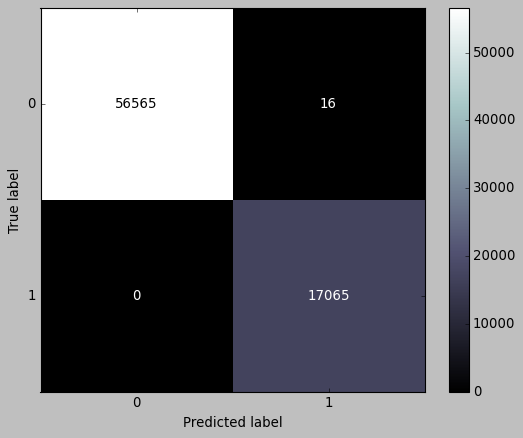

In [43]:
# display confusion matrix
plt.style.use('classic')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='bone')
plt.show()
# 1 in case of fraud and 0 otherwise.

In [44]:
# get the accuracy score 
accuracy_score(y_test,y_pred)

0.999782744480352

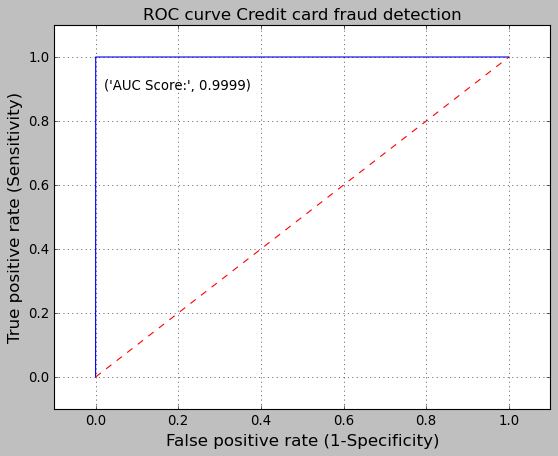

In [45]:
# auc-roc curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve Credit card fraud detection', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)


If we apply SMOTE on the entire data the models will be overfitting and we loose the original data. 

# Treating the class imbalance and then rebuilding the best base models

##### smote on train data 

In [19]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE(sampling_strategy=0.2, random_state=10)

In [20]:
# solve for data imbalance 
x_train_sam, y_train_sam = sm.fit_resample(x_train, y_train)

In [21]:
y_train.value_counts()

0    226594
1       386
Name: Class, dtype: int64

In [22]:
y_train_sam.value_counts()

0    226594
1     45318
Name: Class, dtype: int64

In [23]:
classifiers ={'randomforest':RandomForestClassifier(),
             "xgboost":XGBClassifier()}
    
    
    
model_report=pd.DataFrame(columns=['model_name','accuracy','recall','precision','f1','roc'])

for classifier, classifier_name in list(zip(classifiers.values(), classifiers.keys())):
    classifier.fit(x_train_sam,y_train_sam)
    y_pred=classifier.predict(x_test)
    print('fitting the model ....',classifier_name)
    t=pd.Series({
        'model_name':classifier_name, 
        'accuracy':accuracy_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'f1':f1_score(y_test,y_pred),
        'roc':roc_auc_score(y_test,y_pred)
    })
    model_report=model_report.append(t,ignore_index=True)
    
model_report=model_report.sort_values(by='f1', ascending=False)

fitting the model .... randomforest


C:\Users\telsm\AppData\Local\Temp\ipykernel_8356\1672070715.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


fitting the model .... xgboost


C:\Users\telsm\AppData\Local\Temp\ipykernel_8356\1672070715.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_report=model_report.append(t,ignore_index=True)


In [24]:
model_report

,model_name,accuracy,recall,precision,f1,roc
0,randomforest,0.999559,0.827586,0.878049,0.852071,0.913705
1,xgboost,0.999418,0.793103,0.821429,0.807018,0.896419


The best model is random forest with smote on train data. 

In [27]:
rf=RandomForestClassifier()

In [29]:
rf.fit(x_train_sam,y_train_sam)
y_pred=rf.predict(x_test)

In [31]:
# get the probabiloties 
y_pred_prob = rf.predict(x_test)

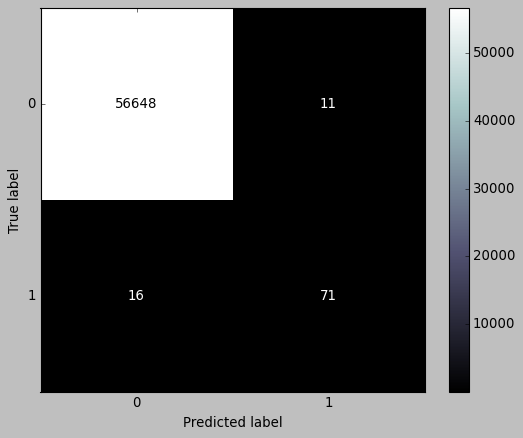

In [32]:
# display confusion matrix
plt.style.use('classic')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, cmap='bone')
plt.show()
# 1 in case of fraud and 0 otherwise.

From the confusion matrix display, the credit card fraud predicted as not fraud even though they are fraud is 16.
From the domain perspective we have to be more precise on the prediction of fraud transactions, means we have to predict more class 1 as class one itself. 

For that we have to check the threshold where we can get a good prediction of credit card frauds. 

In [44]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [48]:
def threshold(model,xtrain,xtest,ytrain,ytest):
    f1 = []
    pres = []
    rec = []
    for i in [0.35,0.40,0.45,0.5,0.55,0.60,0.65]:
        model.fit(xtrain,ytrain)
        ypred = (model.predict_proba(xtest)[:, 1] >= i).astype(int)
        f1.append(f1_score(ytest,ypred))
        pres.append(precision_score(ytest,ypred))
        rec.append(recall_score(ytest,ypred))
    model_df = pd.DataFrame([[0.35,0.40,0.45,0.5,0.55,0.60,0.65],f1,pres,rec],index=["Range","F1 Score","Precision","Recall"]).T
    return model_df.sort_values(by=["F1 Score","Precision","Recall","Range"],ascending=[False,False,False,False])

In [49]:
rf = RandomForestClassifier(random_state=10)
threshold(rf,x_train_sam,x_test,y_train_sam ,y_test)

,Range,F1 Score,Precision,Recall
5,0.60,0.860606,0.910256,0.816092
4,0.55,0.855422,0.898734,0.816092
6,0.65,0.851852,0.920000,0.793103
3,0.50,0.847059,0.867470,0.827586
2,0.45,0.842105,0.857143,0.827586
1,0.40,0.827586,0.827586,0.827586
0,0.35,0.795580,0.765957,0.827586


In [51]:
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train_sam,y_train_sam)


RandomForestClassifier(random_state=10)

In [81]:
ypred = (rf.predict_proba(x_test)[:, 1] >= 0.30).astype(int)

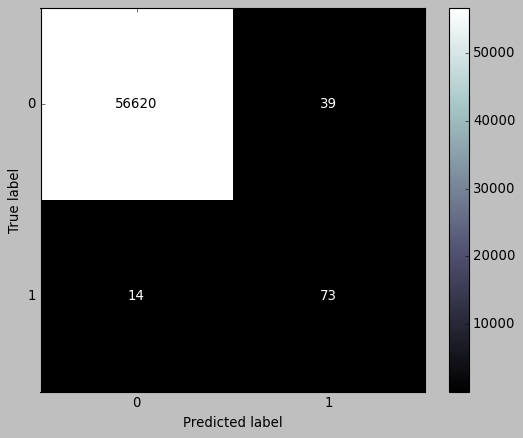

In [82]:
# display confusion matrix
plt.style.use('classic')
ConfusionMatrixDisplay.from_predictions(y_test,ypred, cmap='bone')
plt.show()
# 1 in case of fraud and 0 otherwise.

In [84]:
ypred = (rf.predict_proba(x_test)[:, 1] >= 0.01).astype(int)

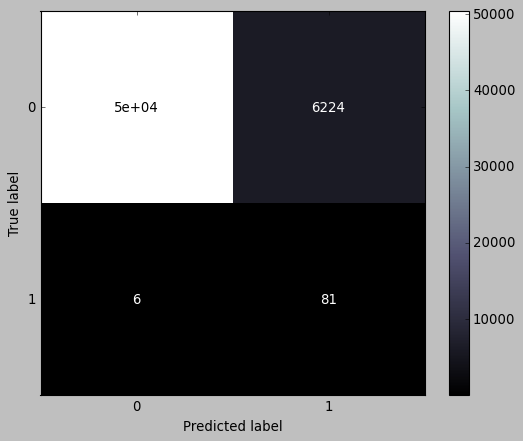

In [85]:
# display confusion matrix
plt.style.use('classic')
ConfusionMatrixDisplay.from_predictions(y_test,ypred, cmap='bone')
plt.show()
# 1 in case of fraud and 0 otherwise.

In [ ]:
# even if we set the threshold as 0.01 there will be 6 frauds being predicted as not a fraud. 

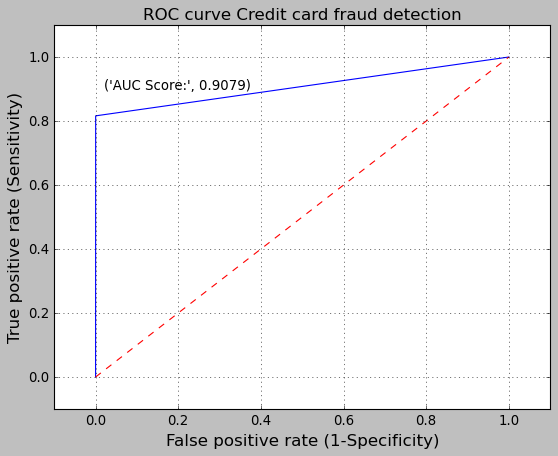

In [83]:
# auc-roc curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve Credit card fraud detection', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)


# Conclusion

The given dataset consisted of data which was treated with PCA doesnt give any ideas about the actual features of credit card fraud detection. 

The predictability of the model is low as the data is already treated using PCA. 

Even though the randomforest model built can predict the credit card fraud with an accuracy of 99%, the credit fraud which can bcannot be predicted is high with this models. 

#### citations 

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics